## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataset

In [4]:
data = pd.read_csv('Crimes_2021_Present.csv')

## Data Inspection

In [48]:
data.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12260346,JE102126,2021-01-03,070XX S EGGLESTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,6.0,68,08B,1174496.0,1858251.0,2021,01/16/2021 03:49:23 PM,41.766435,-87.635964,"(41.766435144, -87.635963997)"
1,12263464,JE105797,2021-01-03,080XX S YALE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,17.0,44,06,1176011.0,1851718.0,2021,01/16/2021 03:49:23 PM,41.748474,-87.630607,"(41.748473982, -87.630606588)"
2,12259990,JE101773,2021-01-03,056XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,29.0,25,08B,1138722.0,1900183.0,2021,01/16/2021 03:49:23 PM,41.882224,-87.766076,"(41.88222427, -87.766076162)"


In [49]:
data.tail(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
164275,12518978,JE418170,2021-10-21,059XX N CLARK ST,4386,OTHER OFFENSE,VIOLATION OF CIVIL NO CONTACT ORDER,SIDEWALK,False,False,...,40.0,77,26,1164611.0,1939252.0,2021,10/28/2021 04:47:30 PM,41.988923,-87.669901,"(41.988922844, -87.669901243)"
164276,12518684,JE417729,2021-10-21,076XX S NORMAL AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,...,17.0,69,26,1174285.0,1854292.0,2021,10/28/2021 04:47:30 PM,41.755576,-87.636855,"(41.755575866, -87.636854877)"
164277,12518334,JE417369,2021-10-21,071XX N WESTERN AVE,502R,OTHER OFFENSE,VEHICLE TITLE / REGISTRATION OFFENSE,VEHICLE NON-COMMERCIAL,False,False,...,50.0,2,26,1159025.0,1947352.0,2021,10/28/2021 04:47:30 PM,42.011266,-87.690224,"(42.011266431, -87.690223501)"


In [7]:
# Overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164278 entries, 0 to 164277
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    164278 non-null  int64  
 1   Case Number           164278 non-null  object 
 2   Date                  164278 non-null  object 
 3   Block                 164278 non-null  object 
 4   IUCR                  164278 non-null  object 
 5   Primary Type          164278 non-null  object 
 6   Description           164278 non-null  object 
 7   Location Description  163720 non-null  object 
 8   Arrest                164278 non-null  bool   
 9   Domestic              164278 non-null  bool   
 10  Beat                  164278 non-null  int64  
 11  District              164278 non-null  int64  
 12  Ward                  164268 non-null  float64
 13  Community Area        164278 non-null  int64  
 14  FBI Code              164278 non-null  object 
 15  

In [8]:
data.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.642780e+05,164278.000000,164278.000000,164268.000000,164278.000000,1.630770e+05,1.630770e+05,164278.0,163077.000000,163077.000000
mean,1.234123e+07,1146.266840,11.233890,23.058739,37.299109,1.165073e+06,1.885480e+06,2021.0,41.841344,-87.669777
std,7.893114e+05,697.089324,6.967717,13.867623,21.622195,1.660962e+04,3.199742e+04,0.0,0.088002,0.060450
min,2.569900e+04,111.000000,1.000000,1.000000,1.000000,1.091242e+06,1.813909e+06,2021.0,41.644608,-87.939733
25%,1.232568e+07,611.000000,6.000000,9.000000,23.000000,1.153237e+06,1.857962e+06,2021.0,41.765570,-87.712703
50%,1.239143e+07,1023.000000,10.000000,23.000000,32.000000,1.166910e+06,1.890730e+06,2021.0,41.855948,-87.663242
75%,1.245654e+07,1713.000000,17.000000,34.000000,55.000000,1.176869e+06,1.908936e+06,2021.0,41.905838,-87.626646
max,1.252477e+07,2535.000000,31.000000,50.000000,77.000000,1.205116e+06,1.951493e+06,2021.0,42.022548,-87.524529


## Data cleaning

In [9]:
data['Date'] = pd.to_datetime(data['Date'].str[0:10], format="%m/%d/%Y")

In [10]:
data['Primary Type'] = data['Primary Type'].astype('category')

In [11]:
# null check
data.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     558
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            1201
Y Coordinate            1201
Year                       0
Updated On                 0
Latitude                1201
Longitude               1201
Location                1201
dtype: int64

In [12]:
# no duplicated data
data.duplicated().sum()

0

In [13]:
data = data.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162570 entries, 0 to 164277
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    162570 non-null  int64         
 1   Case Number           162570 non-null  object        
 2   Date                  162570 non-null  datetime64[ns]
 3   Block                 162570 non-null  object        
 4   IUCR                  162570 non-null  object        
 5   Primary Type          162570 non-null  category      
 6   Description           162570 non-null  object        
 7   Location Description  162570 non-null  object        
 8   Arrest                162570 non-null  bool          
 9   Domestic              162570 non-null  bool          
 10  Beat                  162570 non-null  int64         
 11  District              162570 non-null  int64         
 12  Ward                  162570 non-null  float64       
 13 

---

# Visualization

## 1. What are the top 12 most common crimes of the period?

In [15]:
data2 = data.copy()

In [16]:
gr_by_crime_type = data2[['Primary Type', 'Block']].groupby('Primary Type').agg('count').reset_index()
gr_by_crime_type.columns = ['CrimeType', 'Quantity']

In [17]:
gr_by_crime_type.sort_values(by='Quantity', ascending=False).head(12)

,CrimeType,Quantity
2,BATTERY,32916
29,THEFT,30515
5,CRIMINAL DAMAGE,20079
1,ASSAULT,16518
8,DECEPTIVE PRACTICE,12679
22,OTHER OFFENSE,11250
16,MOTOR VEHICLE THEFT,7990
30,WEAPONS VIOLATION,7398
26,ROBBERY,5943
3,BURGLARY,4933


Text(0.5, 1.0, '2021 Chicago Crime Distribution')

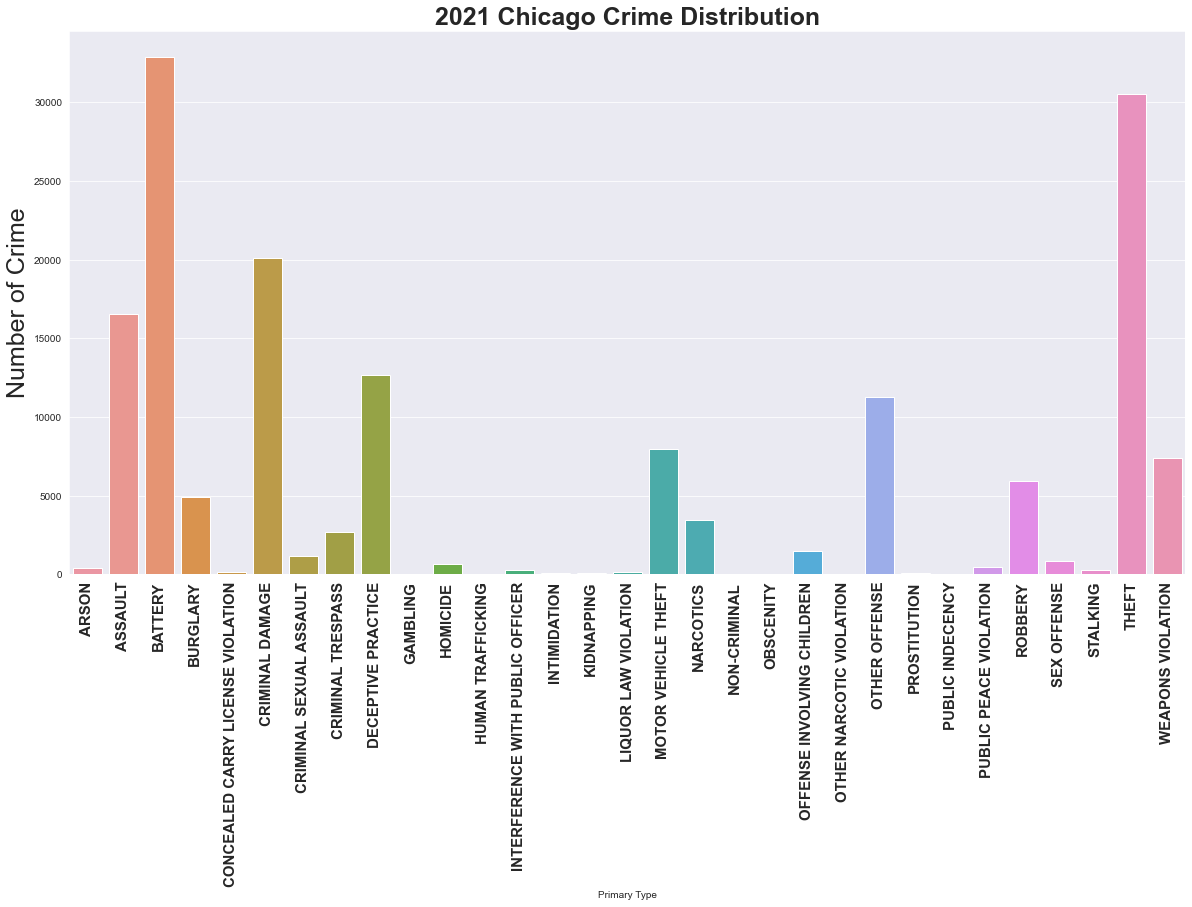

In [35]:
fig, axes = plt.subplots(figsize=(20,10))
kwargs = {'fontweight':'bold', 'fontsize':15}
sns.countplot(data=data, x='Primary Type', orient='h');
plt.ylabel('Number of Crime', fontsize=25)
plt.xticks(rotation=90, **kwargs);
plt.title('2021 Overall Crime Distribution', fontsize=25, fontweight='bold');

## 2. What are the crime types that have median above 50 crimes/day?

In [19]:
top12crime = gr_by_crime_type.sort_values(by='Quantity', ascending=False)[:12]

In [21]:
top12crime= top12crime.CrimeType

In [22]:
data3 = data.copy()

In [23]:
gr_by_day = data3[['Primary Type', 'Date', 'Block']].groupby(by=['Primary Type', 'Date']).agg('count').reset_index()

In [24]:
gr_by_day.columns = ['CrimeType', 'Date', 'Quantity']

In [25]:
gr_by_day = gr_by_day[gr_by_day.CrimeType.isin(top12crime)]

In [26]:
gr_by_day.head()

,CrimeType,Date,Quantity
294,ASSAULT,2021-01-01,39.0
295,ASSAULT,2021-01-02,34.0
296,ASSAULT,2021-01-03,33.0
297,ASSAULT,2021-01-04,38.0
298,ASSAULT,2021-01-05,39.0


In [27]:
rmv = gr_by_crime_type.sort_values(by='Quantity', ascending=False)[12:].values

In [28]:
rmv[:,0]

array(['OFFENSE INVOLVING CHILDREN', 'CRIMINAL SEXUAL ASSAULT',
       'SEX OFFENSE', 'HOMICIDE', 'PUBLIC PEACE VIOLATION', 'ARSON',
       'STALKING', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CONCEALED CARRY LICENSE VIOLATION', 'LIQUOR LAW VIOLATION',
       'INTIMIDATION', 'PROSTITUTION', 'KIDNAPPING', 'OBSCENITY',
       'GAMBLING', 'HUMAN TRAFFICKING', 'NON-CRIMINAL',
       'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION'], dtype=object)

In [29]:
gr_by_day.CrimeType = gr_by_day.CrimeType.cat.remove_categories(rmv[:,0])

In [30]:
gr_by_day.CrimeType.unique()

['ASSAULT', 'BATTERY', 'BURGLARY', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', ..., 'NARCOTICS', 'OTHER OFFENSE', 'ROBBERY', 'THEFT', 'WEAPONS VIOLATION']
Length: 12
Categories (12, object): ['ASSAULT', 'BATTERY', 'BURGLARY', 'CRIMINAL DAMAGE', ..., 'OTHER OFFENSE', 'ROBBERY', 'THEFT', 'WEAPONS VIOLATION']

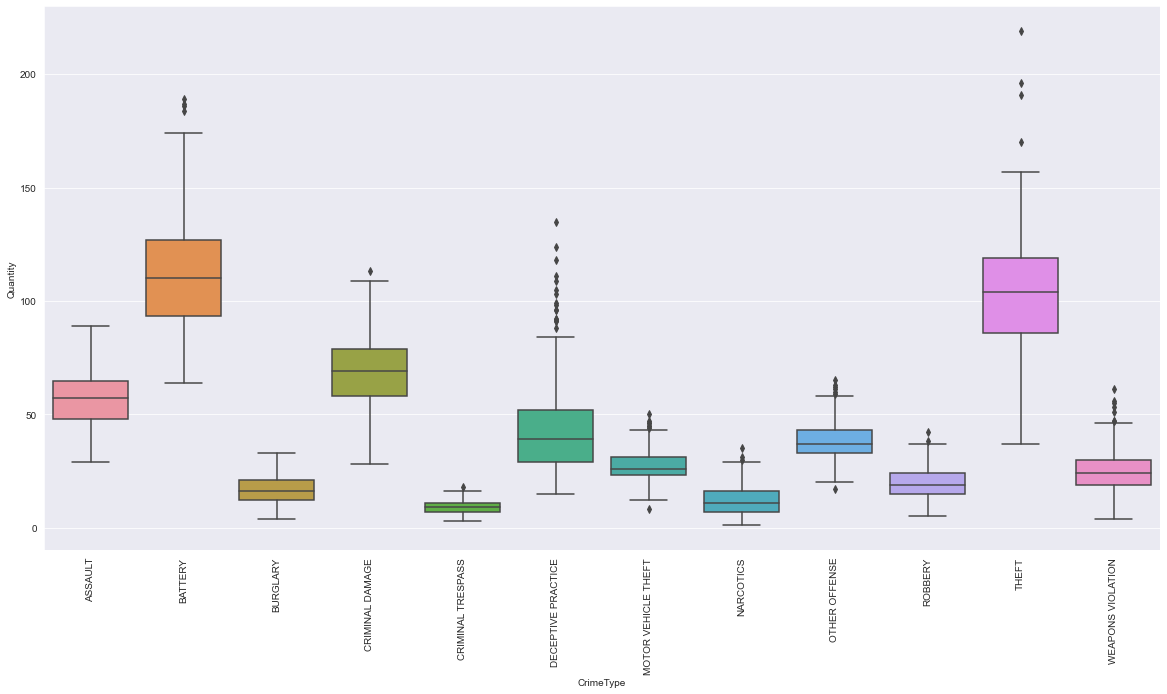

In [45]:
fig, axes = plt.subplots(figsize=(20,10))
sns.boxplot(data=gr_by_day, x='CrimeType', y='Quantity');
plt.xticks(rotation=90);

## 3. For the top crime identified in the last question, use the latitude and longitude to analyse its spread.

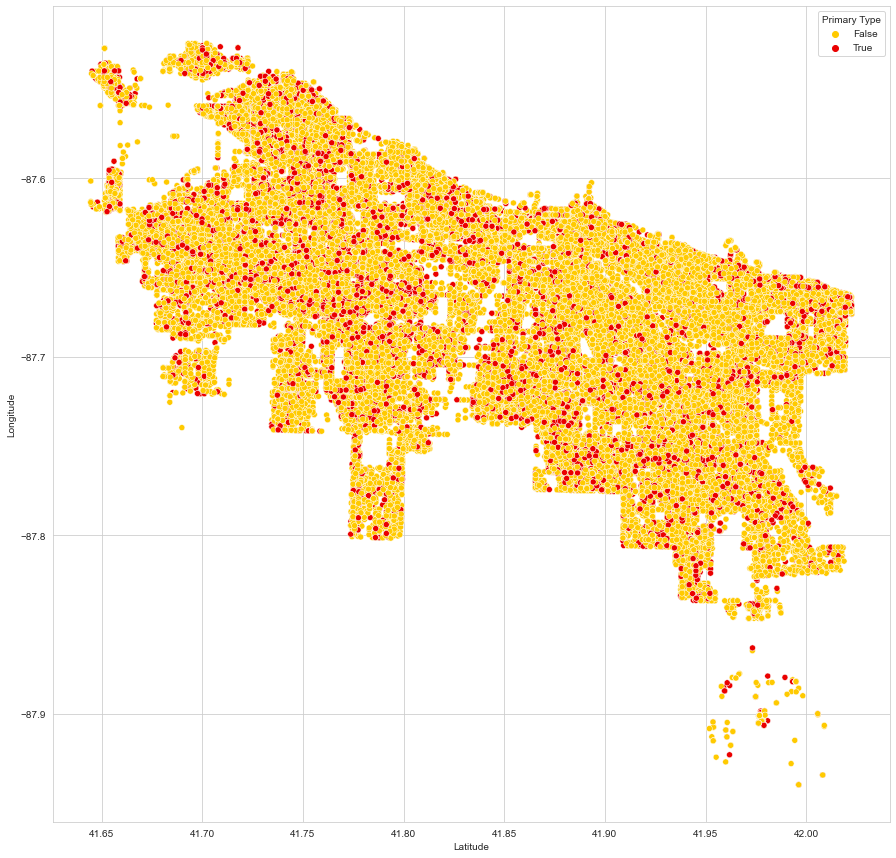

In [50]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(15,15))
sns.scatterplot(data=data, x='Latitude', y='Longitude', hue=data['Primary Type'] == 'BATTERY', palette='hot_r');